In [72]:
pip install pandas

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

In [74]:
pd.__version__

'1.3.5'

In [75]:
data = pd.read_excel("/content/sample_data/LOG1.xlsx")
data

,density(g/cc),porosity(%),Gamma(API),sonic(ms/m,resistivity(ohm-m),porosity
0,2.75,7.000,109.947172,176.329991,7.063904,0.07000
1,2.80,19.000,134.289780,211.380158,5.518617,0.19000
2,2.90,25.000,4.481689,160.999977,8.805975,0.25000
3,2.95,17.000,7.389056,160.340126,9.101752,0.17000
4,3.00,20.000,20.085537,159.589994,9.230339,0.20000
...,...,...,...,...,...,...
1403,2.18,12.656,50.000000,254.619952,5.001191,0.12656
1404,1.46,10.551,46.804017,211.380158,5.518617,0.10551
1405,2.37,16.931,50.680000,208.880077,5.346155,0.16931
1406,1.46,10.551,46.804017,214.630088,5.236442,0.10551


In [76]:
data.describe()

,density(g/cc),porosity(%),Gamma(API),sonic(ms/m,resistivity(ohm-m),porosity
count,1408.000000,1408.000000,1408.000000,1408.000000,1408.000000,1408.000000
mean,2.690473,17.481095,67.278286,172.816881,7.893749,0.174811
std,0.332795,9.833541,38.487479,26.319800,1.696677,0.098335
min,1.000000,3.000000,2.718282,147.449956,4.188199,0.030000
25%,2.650000,11.250250,34.388851,158.459997,6.992923,0.112502
50%,2.757300,15.665000,57.693995,165.549949,7.809582,0.156650
75%,2.862500,20.206000,99.986745,171.752542,9.006019,0.202060
max,3.300000,85.000000,190.566268,312.999920,12.811260,0.850000


In [77]:
pip install plotly

In [78]:
import plotly
import plotly.graph_objs as go
import plotly.express as px

In [98]:
fig = px.scatter(data, x='porosity', y='density(g/cc)', color='Gamma(API)',
                 width=700, height=500,
                 title="2D Scatter Plot")
fig.show()

In [80]:
fig = px.scatter_3d(data, x='Gamma(API)', y='sonic(ms/m', z = 'resistivity(ohm-m)',
                    color='density(g/cc)',
                    title="3D Scatter Plot")
fig.show()

In [81]:
data.head()

,density(g/cc),porosity(%),Gamma(API),sonic(ms/m,resistivity(ohm-m),porosity
0,2.75,7.0,109.947172,176.329991,7.063904,0.07
1,2.80,19.0,134.289780,211.380158,5.518617,0.19
2,2.90,25.0,4.481689,160.999977,8.805975,0.25
3,2.95,17.0,7.389056,160.340126,9.101752,0.17
4,3.00,20.0,20.085537,159.589994,9.230339,0.20


In [99]:
X = data.iloc[:, [-1, 3]].values 

In [100]:
X

array([[7.00000000e-02, 1.76329991e+02],
       [1.90000000e-01, 2.11380158e+02],
       [2.50000000e-01, 1.60999977e+02],
       ...,
       [1.69310000e-01, 2.08880077e+02],
       [1.05510000e-01, 2.14630088e+02],
       [1.69310000e-01, 2.19499983e+02]])

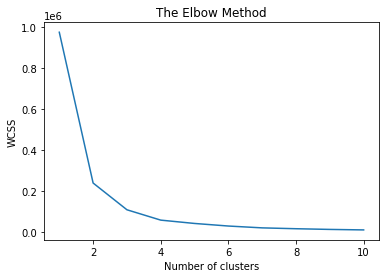

In [101]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

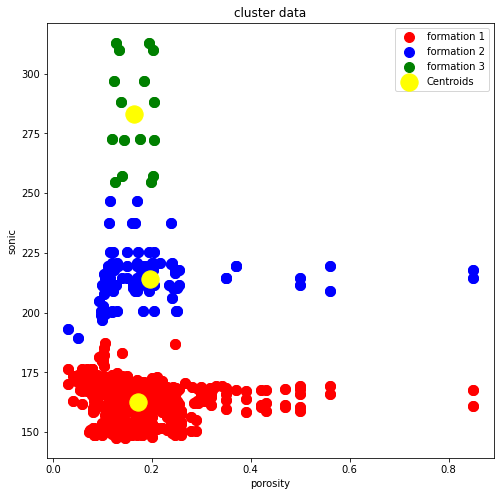

In [102]:
# From Elbow methods take K = 3(number of cluster)
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

plt.figure(figsize=(8,8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'formation 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'formation 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'formation 3')


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')

plt.title('cluster data')
plt.xlabel('porosity')
plt.ylabel('sonic')

plt.legend()
plt.show()

In [86]:
X = data.iloc[:, [0, 2]].values 

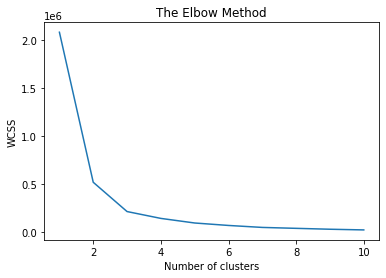

In [87]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

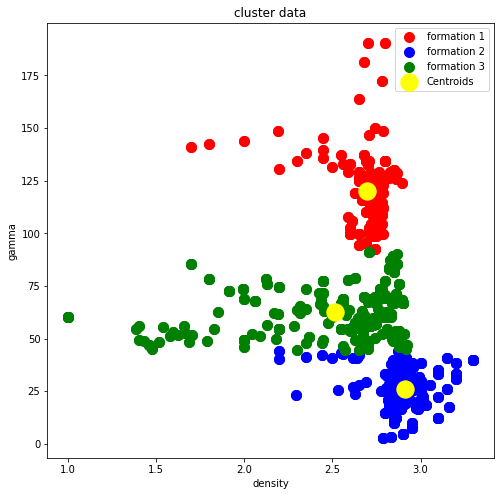

In [88]:
# From Elbow methods take K = 3(number of cluster)
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

plt.figure(figsize=(8,8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'formation 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'formation 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'formation 3')


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')

plt.title('cluster data')
plt.xlabel('density')
plt.ylabel('gamma')

plt.legend()
plt.show()

In [89]:
data.head()

,density(g/cc),porosity(%),Gamma(API),sonic(ms/m,resistivity(ohm-m),porosity
0,2.75,7.0,109.947172,176.329991,7.063904,0.07
1,2.80,19.0,134.289780,211.380158,5.518617,0.19
2,2.90,25.0,4.481689,160.999977,8.805975,0.25
3,2.95,17.0,7.389056,160.340126,9.101752,0.17
4,3.00,20.0,20.085537,159.589994,9.230339,0.20


(array([ 32.,  48., 122., 116.,  84.,  74., 152., 140., 108.,  70.,  44.,
         28.,  38.,  44.,  66.,  66., 112.,  34.,  12.,   8.,   0.,   2.,
          2.,   2.,   4.]),
 array([  2.71828183,  10.23220129,  17.74612076,  25.26004022,
         32.77395969,  40.28787915,  47.80179862,  55.31571808,
         62.82963755,  70.34355702,  77.85747648,  85.37139595,
         92.88531541, 100.39923488, 107.91315434, 115.42707381,
        122.94099327, 130.45491274, 137.9688322 , 145.48275167,
        152.99667113, 160.5105906 , 168.02451006, 175.53842953,
        183.05234899, 190.56626846]),
 <a list of 25 Patch objects>)

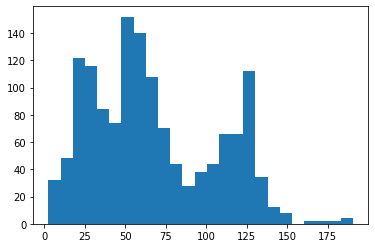

In [90]:
plt.hist(data['Gamma(API)'], bins= 25)

In [91]:
#The channel
#facies are identified with low GR values, the shaly overbank with high GR values,
#and splay-crevasse mixture with intermediate GR values. This cutoff method creates
#demarcating “walls” between the lithofacies-component histograms

In [92]:
fig = px.scatter(data, x='porosity(%)', y='sonic(ms/m', color='Gamma(API)',
                 width=700, height=500,
                 title="2D Scatter Plot")
fig.show()

In [93]:
data.head()

,density(g/cc),porosity(%),Gamma(API),sonic(ms/m,resistivity(ohm-m),porosity
0,2.75,7.0,109.947172,176.329991,7.063904,0.07
1,2.80,19.0,134.289780,211.380158,5.518617,0.19
2,2.90,25.0,4.481689,160.999977,8.805975,0.25
3,2.95,17.0,7.389056,160.340126,9.101752,0.17
4,3.00,20.0,20.085537,159.589994,9.230339,0.20


In [94]:
X = data.iloc[:, [-1, 0]].values 
X

array([[0.07   , 2.75   ],
       [0.19   , 2.8    ],
       [0.25   , 2.9    ],
       ...,
       [0.16931, 2.37   ],
       [0.10551, 1.46   ],
       [0.16931, 2.37   ]])

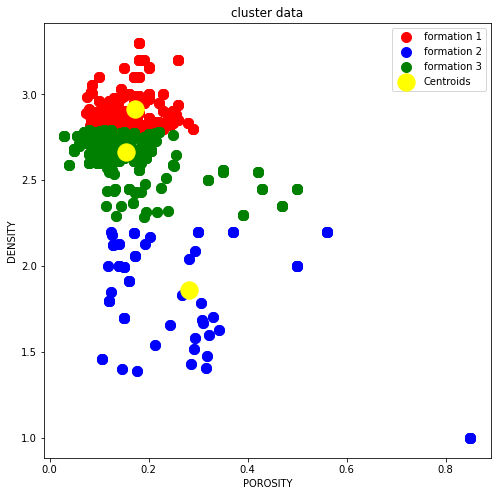

In [95]:
# From Elbow methods take K = 3(number of cluster)
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

plt.figure(figsize=(8,8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'formation 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'formation 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'formation 3')



plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')

plt.title('cluster data')
plt.xlabel('POROSITY')
plt.ylabel('DENSITY')

plt.legend()
plt.show()

In [103]:
data.head()

,density(g/cc),porosity(%),Gamma(API),sonic(ms/m,resistivity(ohm-m),porosity
0,2.75,7.0,109.947172,176.329991,7.063904,0.07
1,2.80,19.0,134.289780,211.380158,5.518617,0.19
2,2.90,25.0,4.481689,160.999977,8.805975,0.25
3,2.95,17.0,7.389056,160.340126,9.101752,0.17
4,3.00,20.0,20.085537,159.589994,9.230339,0.20


In [96]:
X = data.iloc[:, [-2, 2]].values 
X

array([[  7.063904  , 109.94717245],
       [  5.518617  , 134.28977968],
       [  8.805975  ,   4.48168907],
       ...,
       [  5.346155  ,  50.68000026],
       [  5.236442  ,  46.80401712],
       [  5.215371  ,  50.68000026]])

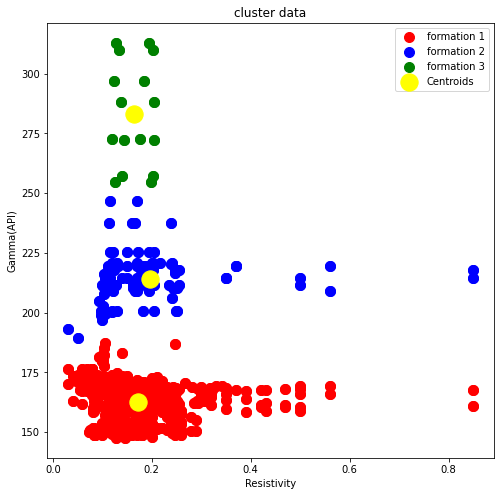

In [104]:
# From Elbow methods take K = 3(number of cluster)
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

plt.figure(figsize=(8,8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'formation 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'formation 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'formation 3')



plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')

plt.title('cluster data')
plt.xlabel('Resistivity')
plt.ylabel('Gamma(API)')

plt.legend()
plt.show()